# 机器学习纳米学位
## 非监督学习
## 项目 3: 创建用户分类

欢迎来到机器学习工程师纳米学位的第三个项目！在这个notebook文件中，有些模板代码已经提供给你，但你还需要实现更多的功能来完成这个项目。除非有明确要求，你无须修改任何已给出的代码。以**'练习'**开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以**'TODO'**标出。请仔细阅读所有的提示！

除了实现代码外，你还**必须**回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 开始

在这个项目中，你将分析一个数据集的内在结构，这个数据集包含很多客户真对不同类型产品的年度采购额（用**金额**表示）。这个项目的任务之一是如何最好地描述一个批发商不同种类顾客之间的差异。这样做将能够使得批发商能够更好的组织他们的物流服务以满足每个客户的需求。

这个项目的数据集能够在[UCI机器学习信息库](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers)中找到.因为这个项目的目的，分析将不会包括'Channel'和'Region'这两个特征——重点集中在6个记录的客户购买的产品类别上。

数据的单位都是**年消费额**：
1. FRESH: annual spending (m.u.) on fresh products (Continuous); 果蔬，肉类，水产品
2. MILK: annual spending (m.u.) on milk products (Continuous); 牛奶制品
3. GROCERY: annual spending (m.u.)on grocery products (Continuous); 食品杂货，香料，油盐酱醋
4. FROZEN: annual spending (m.u.)on frozen products (Continuous) 速冻食品、冷冻食品
5. DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 清洁剂、纸品
6. DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 三明治、沙拉等熟食

运行下面的的代码单元以载入整个客户数据集和一些这个项目需要的Python库。如果你的数据集载入成功，你将看到后面输出数据集的大小。

In [178]:
# 引入这个项目需要的库
import numpy as np
import pandas as pd
import visuals as vs
from IPython.display import display # 使得我们可以对DataFrame使用display()函数

# 设置以内联的形式显示matplotlib绘制的图片（在notebook中显示更美观）
%matplotlib inline

# 载入整个客户数据集
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## 分析数据
在这部分，你将开始分析数据，通过可视化和代码来理解每一个特征和其他特征的联系。你会看到关于数据集的统计描述，考虑每一个属性的相关性，然后从数据集中选择若干个样本数据点，你将在整个项目中一直跟踪研究这几个数据点。

运行下面的代码单元给出数据集的一个统计描述。注意这个数据集包含了6个重要的产品类型：**'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**和 **'Delicatessen'**。想一下这里每一个类型代表你会购买什么样的产品。

In [179]:
# 显示数据集的一个描述
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### 练习: 选择样本
为了对客户有一个更好的了解，并且了解代表他们的数据将会在这个分析过程中如何变换。最好是选择几个样本数据点，并且更为详细地分析它们。在下面的代码单元中，选择**三个**索引加入到索引列表`indices`中，这三个索引代表你要追踪的客户。我们建议你不断尝试，直到找到三个明显不同的客户。

In [180]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [181]:
# 按所有特征降序排列
classes = list(data.columns)
order_by_classes = data.sort_values(classes, ascending=[False]*len(classes))

In [182]:
# 挑选47号记录
order_by_classes.head(11)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
181,112151,29627,18148,16745,4948,8550
125,76237,3473,7102,16538,778,918
284,68951,4411,12609,8692,751,2406
39,56159,555,902,10002,212,2916
258,56083,4563,2124,6422,730,3321
103,56082,3504,8906,18028,1480,2498
259,53205,4959,7336,3012,967,818
282,49063,3965,4252,5970,1041,1404
239,47493,2567,3779,5243,828,2253
176,45640,6958,6536,7368,1532,230


In [183]:
# 挑选96号和338号记录
order_by_classes.tail(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
128,140,8847,3823,142,1062,3
353,117,6264,21203,228,8682,1111
412,97,3605,12400,98,2970,62
65,85,20959,45828,36,24231,1423
357,37,1275,22272,137,6747,110
96,23,2616,8118,145,3874,217
218,18,7504,15205,1285,4797,6372
66,9,1534,7417,175,3468,27
95,3,2920,6252,440,223,709
338,3,333,7021,15601,15,550


In [184]:
# TODO：从数据集中选择三个你希望抽样的数据点的索引
indices = [47, 96, 338]

# 为选择的样本建立一个DataFrame
# 使用loc定位记录，使用reset_index对挑选的记录进行重新索引，以避免乱序。
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,44466,54259,55571,7782,24171,6465
1,23,2616,8118,145,3874,217
2,3,333,7021,15601,15,550


### 问题 1
*在你看来你选择的这三个样本点分别代表什么类型的企业（客户）？*对每一个你选择的样本客户，通过它在每一种产品类型上的花费与数据集的统计描述进行比较，给出你做上述判断的理由。


**提示：** 企业的类型包括超市、咖啡馆、零售商以及其他。注意不要使用具体企业的名字，比如说在描述一个餐饮业客户时，你不能使用麦当劳。

In [185]:
print 'Mean'
display(data.mean())
print '75% percentile'
display(data.quantile(q=0.75))

Mean


Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

75% percentile


Fresh               16933.75
Milk                 7190.25
Grocery             10655.75
Frozen               3554.25
Detergents_Paper     3922.00
Delicatessen         1820.25
Name: 0.75, dtype: float64

**回答:**

ID  | Fresh	| Milk	| Grocery	| Frozen	| Detergents_Paper |	Delicatessen
--- | ---   | ---   | ---   | ---   | ---   | ---
0	|44466	|54259	|55571	|7782	|24171	|6465
1	|23	    |2616	|8118	|145	|3874	|217
2	|3	    |333	|7021	|15601	|15	    |550

- Index = 0（原47号）的企业类型应该是超市。可以看到这个企业的所有6个类别的采购数量不仅远远超过了平均值，也超过了75%的企业。这说明该企业的业务十分广泛，应该是类似于Walmart之类的大型超市。


- Index = 1（原96号）的企业类型应该是咖啡馆。可以看到这个企业需要大量的杂货以及牛奶制品，少量的熟食，还有大量的清洁剂和纸品，几乎不购入冷冻食品和生鲜蔬菜。事实上，咖啡馆消耗的主要是制作咖啡的牛奶、各种香料（咖啡豆、肉桂粉、可可粉、奶油、朗姆酒、调配各种风味饮品的糖浆syrup等）、以及纸杯、纸巾。为了确保咖啡馆的环境，需要消耗大量的纸巾和清洁剂。咖啡馆也会卖一些蛋糕或三明治之类的小食。因此数据符合咖啡馆的特征，基本上应该类似于星巴克这类连锁咖啡馆。


- Index = 2（原338号）的企业应该是冷冻食品的零售专卖商。从数据上看，这个企业唯一超过均值的项目就是Frozen，其他5项都低于平均值，说明该企业的主营业务是冷冻食品。应该是类似于鹏程食品之类的。

### 练习: 特征相关性
一个有趣的想法是，考虑这六个类别中的一个（或者多个）产品类别，是否对于理解客户的购买行为具有实际的相关性。也就是说，当用户购买了一定数量的某一类产品，我们是否能够确定他们必然会成比例地购买另一种类的产品。有一个简单的方法可以检测相关性：我们用移除了某一个特征之后的数据集来构建一个监督学习（回归）模型，然后用这个模型去预测那个被移除的特征，再对这个预测结果进行评分，来判断由余下5个特征构建的模型对移除掉的那一个特征预测能力的好坏。

在下面的代码单元中，你需要实现以下的功能：
 - 使用`DataFrame.drop`函数移除数据集中你选择的不需要的特征，并将移除后的结果赋值给`new_data`。
 - 使用`sklearn.model_selection.train_test_split`将数据集分割成训练集和测试集。
   - 使用移除的特征作为你的目标标签。设置`test_size`为`0.25`并设置一个`random_state`。
 - 导入一个DecisionTreeRegressor（决策树回归器），设置一个`random_state`，然后用训练集训练它。
 - 使用回归器的`score`函数输出模型在测试集上的预测得分。

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# TODO：为DataFrame创建一个副本，用'drop'函数丢弃一些指定的特征

def test_feature(feature):
    f = data[feature]
    new_data = data.drop(feature, axis=1)

    # TODO：使用给定的特征作为目标，将数据分割成训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(new_data, f, test_size=0.25, random_state=0)

    # TODO：创建一个DecisionTreeRegressor（决策树回归器）并在训练集上训练它
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train, y_train)

    # TODO：输出在测试集上的预测得分
    y_pred = regressor.predict(X_test)
    score = r2_score(y_test, y_pred)
#     print "<" + feature + "> prediction R2_Score =", score
    return score

res = {}
for x in data.columns:
    res[x] = test_feature(x)

sorted_feature = sorted(res.iteritems(), key=lambda d:d[1], reverse = True)

print "每个特征作为被预测列的R2评分："
for s in sorted_feature:
    print s

每个特征作为被预测列的R2评分：
('Detergents_Paper', 0.72865518125414541)
('Grocery', 0.60280197887845888)
('Milk', 0.36572529273630905)
('Frozen', 0.25397344669700861)
('Fresh', -0.25246980768827321)
('Delicatessen', -11.663687159428036)


### 问题 2
*你尝试预测哪一个特征？预测的得分是多少？这个特征对于区分用户的消费习惯来说必要吗？*  
**提示：** 决定系数（coefficient of determination）, `R^2`,结果在0到1之间，1表示完美拟合，一个负的`R^2`表示模型不能够拟合数据。

**回答:**

- 我对所有的特征都尝试了预测，从上面的代码结果可以看到，最能够被准确预测的特征是 `Detergent_Paper`，其测试集的 $R^2$ 分达到了0.72，然后按照分数高低依次是 `Grocery`, `Milk`, `Frozen`, `Fresh`, `Deli`, 其中最后两个 `Fresh`, `Deli` 的 $R^2$ 分是负值，说明这俩特征比较特立独行。


- `Detergent_Paper` 得分最高，说明它与其他特征的相关性最强，换句话说，就是我们可以通过其他特征来部分决定（72%）这个特征。因此我认为 `Detergent_Paper` 在对于区分用户消费习惯的问题上并不像 `Fresh`, `Deli` 那么不可或缺，因为后者很难用其他特征涵盖。


### 总之，$R^2$分值与相关性成正比，和不可或缺性成反比。

### 可视化特征分布
为了能够对这个数据集有一个更好的理解，我们可以对数据集中的每一个产品特征构建一个散布矩阵（scatter matrix）。如果你发现你在上面尝试预测的特征对于区分一个特定的用户来说是必须的，那么这个特征和其它的特征可能不会在下面的散射矩阵中显示任何关系。相反的，如果你认为这个特征对于识别一个特定的客户是没有作用的，那么通过散布矩阵可以看出在这个数据特征和其它特征中有关联性。运行下面的代码以创建一个散布矩阵。

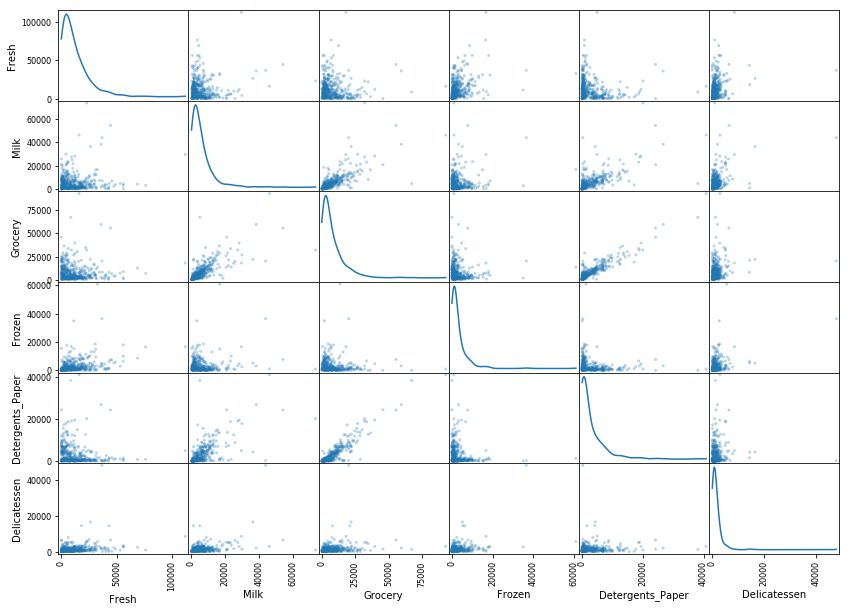

In [187]:
# 对于数据中的每一对特征构造一个散布矩阵
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,10), diagonal = 'kde');

In [188]:
def test_feature(feature, label):
    milk = data[feature]
    new_data = data[label].values.reshape(-1, 1)    # Need to reshape X when it only has one feature.

    # TODO：使用给定的特征作为目标，将数据分割成训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(new_data, milk, test_size=0.2, random_state=0)

    # TODO：创建一个DecisionTreeRegressor（决策树回归器）并在训练集上训练它
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train, y_train)

    # TODO：输出在测试集上的预测得分
    y_pred = regressor.predict(X_test)
    score = r2_score(y_test, y_pred)
#     print "<" + feature + "> prediction R2_Score =", score
    return score

print 'Predicting Detergents_Paper feature: '
for x in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicatessen']:
    print '-> Using only', x, ':', test_feature('Detergents_Paper', x)

Predicting Detergents_Paper feature: 
-> Using only Fresh : -1.33785984135
-> Using only Milk : 0.116879407346
-> Using only Grocery : 0.681148452262
-> Using only Frozen : -1.2061879669
-> Using only Delicatessen : -1.45074342777


### 问题 3
*这里是否存在一些特征他们彼此之间存在一定程度相关性？如果有请列出。这个结果是验证了还是否认了你尝试预测的那个特征的相关性？这些特征的数据是怎么分布的？*

**提示：** 这些数据是正态分布(normally distributed)的吗？大多数的数据点分布在哪？

**回答:**

- **问：这里是否存在一些特征他们彼此之间存在一定程度相关性？如果有请列出。这个结果是验证了还是否认了你尝试预测的那个特征的相关性？**


- 答：上面的散点矩阵本质上表示了特征与特征之间两两的相关分布，可以理解为协方差矩阵的可视化表示（不知道我理解的对不对，有问题请指正 ^_^）

    由于在上个问题我们已经得知 $Detergent\_Paper$ 的 $R_2$ 得分最高，因此我们可以观察这个特征在散点矩阵上的图。可以看到36个图中，比较有特点的图是 $Detergent\_Paper$ 与 $Grocery$ 和 $Milk$ 的散点图，图上的数据点呈现出明显类似于 $ y = x $ 的分布，散点分布在两个坐标轴的中间区域。相比之下，剩下的散点图中，绝大多数的点都全堆在X轴附近或者Y轴附近。这个特点似乎说明 $Detergent\_Paper$ 与 $Grocery$ 和 $Milk$ 这两个特征最为紧密相关。

    为了验证和量化它们之间的相关性，我直接分别使用单个特征 $Grocery$ 和 $Milk$ 对 $Detergent\_Paper$ 进行预测，从上面的代码可以看到，光 $Grocery$ 一个特征就能决定 $Detergent\_Paper$ 达到 0.68 之多！这与散点图中明显的线性分布特点一致。


- **问：这些特征的数据是怎么分布的？**


- 答：从图中的累积概率密度图可以看到，所有特征都不是正态分布，而是右倾斜的（Right-Skewed），具有一个瘦长的主峰，主峰的右侧是一个长长的尾巴。从图中的两两特征散点图可以看到，绝大多数点都距离坐标轴很近，堆在一起，并没有均匀分散在整个坐标空间内。



## 数据预处理
在这个部分，你将通过在数据上做一个合适的缩放，并检测异常点（你可以选择性移除）将数据预处理成一个更好的代表客户的形式。预处理数据是保证你在分析中能够得到显著且有意义的结果的重要环节。

### 练习: 特征缩放
如果数据不是正态分布的，尤其是数据的平均数和中位数相差很大的时候（表示数据非常歪斜）。这时候通常用一个非线性的缩放是[很合适的](https://github.com/czcbangkai/translations/blob/master/use_of_logarithms_in_economics/use_of_logarithms_in_economics.pdf)，[（英文原文）](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) — 尤其是对于金融数据。一种实现这个缩放的方法是使用[Box-Cox 变换](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html)，这个方法能够计算出能够最佳减小数据倾斜的指数变换方法。一个比较简单的并且在大多数情况下都适用的方法是使用自然对数。

在下面的代码单元中，你将需要实现以下功能：
 - 使用`np.log`函数在数据 `data` 上做一个对数缩放，然后将它的副本（不改变原始data的值）赋值给`log_data`。
 - 使用`np.log`函数在样本数据 `samples` 上做一个对数缩放，然后将它的副本赋值给`log_samples`。

### 注意：这里的Log Transform是上面所说的Box-Cox变换当 $\lambda = 0$ 时的特例

$$
\displaystyle
\mathbf{Box-Cox ~ Tranform} \quad y = 
\begin{cases}
\frac {x^{\lambda} - 1} {\lambda} \quad when \; \lambda \neq 0 \quad (\mathrm{Power ~ Transform})\\[2ex]
log_e x  \quad when \; \lambda = 0 \quad (\mathrm{Log ~ Transform})
\end{cases}
$$

$\lambda$ | 相应的函数变换
--- | ---
0   | $\ln x$
1   | $x$
2   | $x^2$
-1  | $1/x$
-2  | $1/x^2$

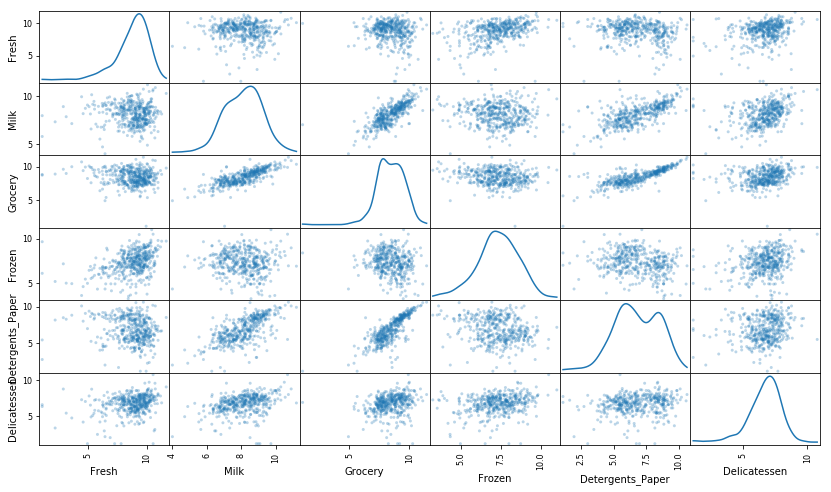

In [189]:
# TODO：使用自然对数缩放数据
log_data = np.log(data)
# 等效于下面的代码
# from scipy.stats import boxcox
# log_data = pd.DataFrame(boxcox(data, 0))

# TODO：使用自然对数缩放样本数据
log_samples = np.log(samples)

# 为每一对新产生的特征制作一个散射矩阵
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### 计算变换前后的Skewness

In [190]:
# 检查Skewness：
# 越接近0表示越接近正态分布
# 大于0表示Right-Skewed（右长尾）
# 小于0表示Left-Skewed（左长尾）
from scipy.stats import skew
skew_before = [round(x, 2) for x in skew(data)]
skew_after = [round(x, 2) for x in skew(log_data)]
print "Before Log Transform: Skewness =", skew_before
print "After Log Transform: Skewness =", skew_after

Before Log Transform: Skewness = [2.55, 4.04, 3.58, 5.89, 3.62, 11.11]
After Log Transform: Skewness = [-1.62, -0.23, -0.74, -0.36, -0.27, -1.17]


将倾斜度的前后变化与对数变换前后的图表结合，可以看到变换前数据分布全都呈现右长尾，倾斜度都是较大的正值，而变换之后的倾斜度都变为了十分接近0的负值，相应的图中的分布曲线也呈现左侧稍长的特点，两者相互印证。

### 观察
在使用了一个自然对数的缩放之后，数据的各个特征会显得更加的正态分布。对于任意的你以前发现有相关关系的特征对，观察他们的相关关系是否还是存在的（并且尝试观察，他们的相关关系相比原来是变强了还是变弱了）。

运行下面的代码以观察样本数据在进行了自然对数转换之后如何改变了。

可以看到变换后的数据分布被放大至整个坐标空间，绝大多数都呈圆型，只有少数几个图呈现明显的线性分布关系（$Detergents\_Paper$ vs $Grocery$等）

我理解对数变换并不会改变特征之间的相关关系。（不知道对不对？）

In [191]:
# 展示经过对数变换后的样本数据
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.702480,10.901524,10.925417,8.959569,10.092909,8.774158
1,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
2,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


### 用箱图显示每个特征经过变换前后的Q1/Q2/Q3/Q4以及IQR和Outlier的距离关系

可以看到处理后的特征的Q1-Q3的Box位置都相对处于比较中间的位置，且单位尺度也从10^5降到了10^1。可以把箱图看作是俯视概率密度曲线的投影，箱部就是主峰，散落的outlier就是长尾。

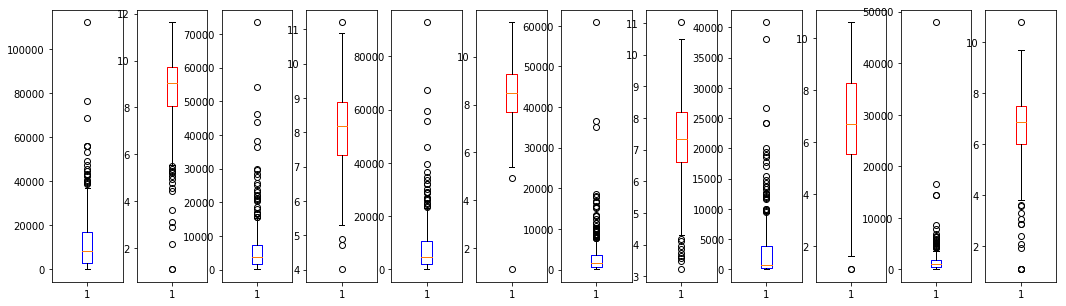

In [192]:
# Boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 5))
for i in range (1, 13, 2):
    plt.subplot(1, 12, i)
    bp = plt.boxplot(data.iloc[:, (i - 1)/2])
    plt.setp(bp['boxes'], color='blue')
    plt.subplot(1, 12, i + 1)
    bp2 = plt.boxplot(log_data.iloc[:, (i - 1)/2])
    plt.setp(bp2['boxes'], color='red')
plt.show()

### 练习: 异常值检测
对于任何的分析，在数据预处理的过程中检测数据中的异常值都是非常重要的一步。异常值的出现会使得把这些值考虑进去后结果出现倾斜。这里有很多关于怎样定义什么是数据集中的异常值的经验法则。这里我们将使用[Tukey的定义异常值的方法](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/)：一个*异常阶（outlier step）*被定义成1.5倍的四分位距（interquartile range，IQR）。一个数据点如果某个特征包含在该特征的IQR之外的特征，那么该数据点被认定为异常点。

在下面的代码单元中，你需要完成下面的功能：
 - 将指定特征的25th分位点的值分配给`Q1`。使用`np.percentile`来完成这个功能。
 - 将指定特征的75th分位点的值分配给`Q3`。同样的，使用`np.percentile`来完成这个功能。
 - 将指定特征的异常阶的计算结果赋值给`step`.
 - 选择性地通过将索引添加到`outliers`列表中，以移除异常值。

**注意：** 如果你选择移除异常值，请保证你选择的样本点不在这些移除的点当中！
一旦你完成了这些功能，数据集将存储在`good_data`中。

#### np.percentile 与 pd.DataFrame.quantile 的用法不同！
一个用百分数，一个用小数。
- np.percentile（data, q = 25)
- df.quantile(q=0.25)

In [193]:
idx_dict = {}
# 对于每一个特征，找到值异常高或者是异常低的数据点
for feature in log_data.keys():
    
    # TODO：计算给定特征的Q1（数据的25th分位点）
    Q1 = np.percentile(a=log_data[feature], q=25)
    
    # TODO：计算给定特征的Q3（数据的75th分位点）
    Q3 = np.percentile(a=log_data[feature], q=75)
    
    # TODO：使用四分位范围计算异常阶（1.5倍的四分位距）
    step = 1.5 * (Q3 - Q1)
    
    # 显示异常点
    print "Data points considered outliers for the feature '{}':".format(feature)
    outlier_candidate = log_data[(log_data[feature] < Q1 - step) | (log_data[feature] > Q3 + step)]
    idx_dict[feature] = list(outlier_candidate.index)
    print idx_dict[feature]
#     display(outlier_candidate.sort_values(feature))

# 统计一下出现在多个特征的异常值范围的记录
freq_map = {}
for f in idx_dict.values():
    for x in f:
        freq_map.setdefault(x, 0)
        freq_map[x] += 1

# 显示出现频率多于1次的记录编号

print '\nSamples categorized as Outlier for more than once:'
for x in freq_map:
    if freq_map[x] > 1:
        print x, '->', freq_map[x], 'times'
    
# 可选：选择你希望移除的数据点的索引
# 具体移除原因见后面的分析
outliers  = [128, 154, 65, 66, 75]

# 如果选择了的话，移除异常点
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print '\nSample Size shrink from {} to {}.'.format(log_data.shape[0], good_data.shape[0])

print '\nHere are the outliers:'
log_data.loc[outliers]

Data points considered outliers for the feature 'Fresh':
[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412]
Data points considered outliers for the feature 'Milk':
[86, 98, 154, 356]
Data points considered outliers for the feature 'Grocery':
[75, 154]
Data points considered outliers for the feature 'Frozen':
[38, 57, 65, 145, 175, 264, 325, 420, 429, 439]
Data points considered outliers for the feature 'Detergents_Paper':
[75, 161]
Data points considered outliers for the feature 'Delicatessen':
[66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]

Samples categorized as Outlier for more than once:
128 -> 2 times
154 -> 3 times
65 -> 2 times
66 -> 2 times
75 -> 2 times

Sample Size shrink from 440 to 435.

Here are the outliers:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


### 问题 4
*请列出所有在多于一个特征下被看作是异常的数据点。这些点应该被从数据集中移除吗？为什么？把你认为需要移除的数据点全部加入到到`outliers`变量中。* 

### Review Comments

异常点的寻找和判断是否移除是一个复杂的事情，这里会融入比较多的 domain knowledge，Tukey的定义异常值的方法只是方法之一。有时也要根据模型的特点来决定。例如有的模型对异常点非常敏感，异常点的存在会影响模型的预测结果；有的模型对异常点不那么敏感。更多时候会通过比较移除异常点和不移除异常点的预测结果来决定是否应该做这件事。

**原回答:**

上面的代码已经统计了在所有特征下被判断为异常值的记录编号，并统计得到出现频率大于一次的记录有5个，分别是[128, 154, 65, 66, 75].

之前挑选的三个Sample中有一个就在这个范围内...因此仅将剩下的4个点从log_data中去除。

### Rework Answer

这次在前几个问题中我已经重新选取了sample，没有再选属于这5个异常点之中的点（65），而是选了一个类似分布但是没有那么异常的点，因此这里移除异常点的时候不会受限制了。下面开始分析为什么移除异常点：

- 如何判断Outlier是否应该去除？要看移除先后对模型产生的影响有多大。然而模型最终的目的是为了发掘隐藏的真相，或者用于预测新的数据。因此异常点的影响应该具体到是否会导致聚类划分准确度下降这类问题上。


- 如何衡量对模型的影响大小？感觉应该用后面的轮廓系数衡量聚类的好坏，或者直接比对原有Channel的预测正确率。


- 下面我用了后面问题所采用的方法对移除异常点前后的模型性能进行了分析。

（其实我觉得这个问题应该在项目最后问。要不然一路从问题1做到这的时候，手上的工具其实很少，有些无从下手啊!!!）

### 通过移除Tukey定义的异常点，对比K-Means与GMM对异常点的敏感性

In [194]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

candidates = [128, 154, 65, 66, 75]
# cluster.csv already removed the 5 candidate outliers. (Shape = 435)
y_true = pd.read_csv('cluster.csv')['cluster']
# customers.csv has the 5 candidate outliers. (Shape = 440)
before_removal = log_data
after_removal = log_data.drop(log_data.index[candidates]).reset_index(drop = True)

def test_outliers(model, data, components):
    pca = PCA(n_components=components, random_state=0)
    pca.fit(data)
    data = pca.transform(data)
    data = pd.DataFrame(data)
    if model is 'KMeans':
        clusterer = KMeans(n_clusters=components, max_iter=500, n_init=10, random_state=0)
    else:
        clusterer = GaussianMixture(n_components=components, random_state=0)
    clusterer.fit(data)
    preds = clusterer.predict(data)
    score = silhouette_score(data, preds)
    return preds, score

def compare_model(model):
    print '\nUsing {} Model'.format(model)
    y_pred_before, score = test_outliers(model, before_removal, 2)
    y_pred_before = pd.Series(y_pred_before).drop(log_data.index[candidates]).reset_index(drop = True)
    acc_score = accuracy_score(y_true, y_pred_before)
    # Swap label's 0/1 to get the max accuray score.
    acc_score = max(acc_score, 1 - acc_score)
    print 'Before Remove Outliers: Cluster Accuracy = {}, Silhouette Score = {}'.format(acc_score, score)
    y_pred_after, score = test_outliers(model, after_removal, 2)
    acc_score = accuracy_score(y_true, y_pred_after)
    acc_score = max(acc_score, 1 - acc_score)
    print ' After Remove Outliers: Cluster Accuracy = {}, Silhouette Score = {}'.format(acc_score, score)

compare_model('KMeans')
compare_model('GMM')


Using KMeans Model
Before Remove Outliers: Cluster Accuracy = 0.951724137931, Silhouette Score = 0.419166083203
 After Remove Outliers: Cluster Accuracy = 0.95632183908, Silhouette Score = 0.426281015469

Using GMM Model
Before Remove Outliers: Cluster Accuracy = 0.87816091954, Silhouette Score = 0.409968324528
 After Remove Outliers: Cluster Accuracy = 0.91724137931, Silhouette Score = 0.421916846463


- 通过上面的计算可以看到，移除同样的5个异常点，K-Means预测的准确率上升了0.5%，而GMM则上升了4%，这起码说明GMM模型对于这5个异常点的敏感度要远远超过K-Means。虽然实际生活中可能不会刚好有现成的label供你评估聚类的准确性，但是在这里也不失为一种评估异常点对模型影响大小的方法。


- 原本我还想通过比对移除异常点前后的轮廓系数来说明问题，但是考虑到轮廓系数仅仅是每个点距离自己所属聚类中心和最近其他聚类中心的比例，这个参数顶多能够分析聚类的离散程度，但是聚类离散并不是聚类的错，而仅仅是一种数据的分布特征而已，显然越致密、相互分的越开的聚类轮廓系数得分越高，但这并不能够证明异常点对模型的影响力，因此轮廓系数不能作为移除异常点的依据。（不知道对不对？）


- 结论：由于上面的计算显示移除异常点后的确能够提高模型的预测准确性（在具有Ground Truth的前提下），因此这里选择移除了这5个异常点。

## 特征转换
在这个部分中你将使用主成分分析（PCA）来分析批发商客户数据的内在结构。由于使用PCA在一个数据集上会计算出最大化方差的维度，我们将找出哪一个特征组合能够最好的描绘客户。

### 练习: 主成分分析（PCA）

既然数据被缩放到一个更加正态分布的范围中并且我们也移除了需要移除的异常点，我们现在就能够在`good_data`上使用PCA算法以发现数据的哪一个维度能够最大化特征的方差。除了找到这些维度，PCA也将报告每一个维度的*解释方差比（explained variance ratio）*--这个数据有多少方差能够用这个单独的维度来解释。注意PCA的一个组成部分（维度）能够被看做这个空间中的一个新的“特征”，但是它是原来数据中的特征构成的。

在下面的代码单元中，你将要实现下面的功能：
 - 导入`sklearn.decomposition.PCA`并且将`good_data`用PCA并且使用6个维度进行拟合后的结果保存到`pca`中。
 - 使用`pca.transform`将`log_samples`进行转换，并将结果存储到`pca_samples`中。

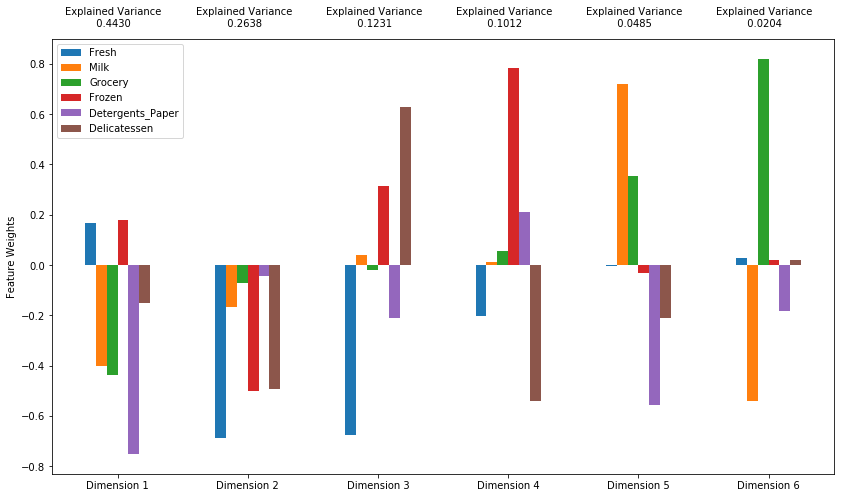

In [195]:
# TODO：通过在good data上使用PCA，将其转换成和当前特征数一样多的维度
from sklearn.decomposition import PCA
pca = PCA(n_components=6, random_state=0)
pca.fit(good_data)

# TODO：使用上面的PCA拟合将变换施加在log_samples上
pca_samples = pca.transform(log_samples)

# 生成PCA的结果图
pca_results = vs.pca_results(good_data, pca)

### 问题 5
*数据的第一个和第二个主成分* **总共** *表示了多少的方差？*  前四个主成分呢？使用上面提供的可视化图像，讨论从用户花费的角度来看前四个**主要成分**的消费行为最能代表哪种类型的客户并给出你做出判断的理由。

**提示：** 某一特定维度上的正向增长对应**正权**特征的**增长**和**负权**特征的**减少**。增长和减少的速率和每个特征的权重相关。[参考资料(英文)](https://onlinecourses.science.psu.edu/stat505/node/54)。

**回答:**

前2个主成分包含了0.71的方差。前4个主成分则包含了0.93的方差（几乎是全部了），说明经过PCA变换后的特征只需要用4个新特征几乎就能代替原来的6个特征了。

- 第0个主成分中：Milk + Grocery + Detergents_Paper 一伙，与 Fresh + Frozen 呈负相关。这应该是**光卖牛奶和非食物，或者卖食物就不卖牛奶和非食物的行为特质**。
- 第1个主成分中：Fresh + Frozen + Deli 一伙，与其他特征全都呈正相关。这应该是**什么都卖，而且主要卖食品的行为特质**。
- 第2个主成分中：Fresh + Detergents_Paper 一伙，与 Deli + Frozen 呈强烈负相关，这应该是**卖熟食和冷冻食品，但是不卖生鲜的行为特质**。
- 第3个主成分中：Deli + Fresh 一伙，与 Frozen 呈强烈负相关，这应该是**卖熟食和生鲜，但是不卖冷冻食品的行为特质**（和上面的组合不同）。

### 特征 to 主成分的具体投影关系：以第一维度为例

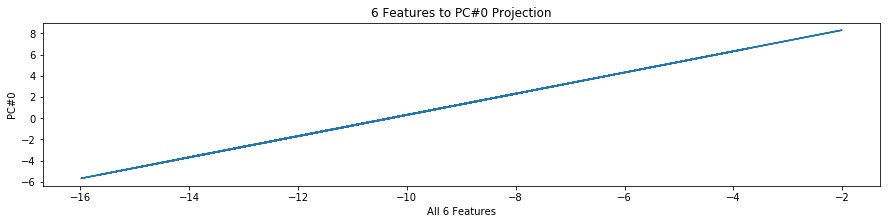

Weights for PC#0:  [ 0.1675 -0.4014 -0.4381  0.1782 -0.7514 -0.1499]


In [196]:
# 6 Features Project to Dimension 1 (PC #0)
# coef 就是上图中每个Bar在纵坐标上的值（权重系数）
coef = pca.components_[0, :]
test_feature = np.dot(log_data, coef).T            # test_feature 是所有特征与相应权重的组合值
test_pca = pd.DataFrame(pca.transform(log_data))
test_pca = list(test_pca.loc[:, 0])

plt.figure(figsize=(15,3))
plt.plot(test_feature, test_pca)
plt.title("6 Features to PC#0 Projection")
plt.xlabel('All 6 Features')
plt.ylabel('PC#0')
plt.show()
print 'Weights for PC#0: ', coef.round(4)

可以看到，原来的6个特征向第0个主成分的投影是完全线性的，说明sklearn.pca求得的主成分的确是所有特征的线性组合，斜率是对所有系数的放大倍数（因为之前计算出的权重系数已经统一化简至1以内），截距是一个常数。因此可以直观的显示为如下的方程：

$$
\begin{aligned}
&Dimension_{\,0} = k \cdot (w_0 \cdot \mathrm{Fresh} - w_1 \cdot \mathrm{Milk} - w_2 \cdot \mathrm{Grocery} + w_3 \cdot \mathrm{Frozen} - w_4 \cdot \mathrm{Dp} - w_5 \cdot \mathrm{Deli}) + intercept\\[2ex]
&\mathbf{w} = [0.16, \;-0.40, \;-0.43, \;0.17, \;-0.75, \;-0.14]
\end{aligned}
$$

总结下，主成分的计算可以理解为：
    - 矩阵的线性变换
    - 坐标轴的投影
    
现在我理解上面的6个直方图其实呈现的是特征到主成分的映射关系，以及在一个主成分中，这些特征相互之间是如何相关的。

### 观察
运行下面的代码，查看经过对数转换的样本数据在进行一个6个维度的主成分分析（PCA）之后会如何改变。观察样本数据的前四个维度的数值。考虑这和你初始对样本点的解释是否一致。

In [197]:
# 展示经过PCA转换的sample log-data
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-4.3646,-3.9519,-0.1229,0.6240,0.5379,0.0551
1,-2.3971,5.6303,1.9179,0.3527,-0.4430,0.0791
2,3.0206,4.8169,6.4519,2.7403,0.7788,2.1415


### 练习：降维
当使用主成分分析的时候，一个主要的目的是减少数据的维度，这实际上降低了问题的复杂度。当然降维也是需要一定代价的：更少的维度能够表示的数据中的总方差更少。因为这个，*累计解释方差比（cumulative explained variance ratio）*对于我们确定这个问题需要多少维度非常重要。另外，如果大部分的方差都能够通过两个或者是三个维度进行表示的话，降维之后的数据能够被可视化。

在下面的代码单元中，你将实现下面的功能：
 - 将`good_data`用两个维度的PCA进行拟合，并将结果存储到`pca`中去。
 - 使用`pca.transform`将`good_data`进行转换，并将结果存储在`reduced_data`中。
 - 使用`pca.transform`将`log_samples`进行转换，并将结果存储在`pca_samples`中。

In [198]:
# TODO：通过在good data上进行PCA，将其转换成两个维度
# (不要开启Whiten！否则后续KMeans聚类的最佳划分是3个！)
pca = PCA(n_components=2, random_state=0)
pca.fit(good_data)

# TODO：使用上面训练的PCA将good data进行转换
reduced_data = pca.transform(good_data)

# TODO：使用上面训练的PCA将log_samples进行转换
pca_samples = pca.transform(log_samples)

# 为降维后的数据创建一个DataFrame
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### 观察
运行以下代码观察当仅仅使用两个维度进行PCA转换后，这个对数样本数据将怎样变化。观察这里的结果与一个使用六个维度的PCA转换相比较时，前两维的数值是保持不变的。

#### 每个主成分都包含所有特征，因此不管PCA分离出多少个主成分，最重要的主成分的权重系数一定是一样的。

In [199]:
# 展示经过两个维度的PCA转换之后的样本log-data
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-4.3646,-3.9519
1,-2.3971,5.6303
2,3.0206,4.8169


## 可视化一个双标图（Biplot）
双标图是一个散点图，每个数据点的位置由它所在主成分的分数确定。坐标系是主成分（这里是`Dimension 1` 和 `Dimension 2`）。此外，双标图还展示出初始特征在主成分上的投影。一个双标图可以帮助我们理解降维后的数据，发现主成分和初始特征之间的关系。

运行下面的代码来创建一个降维后数据的双标图。

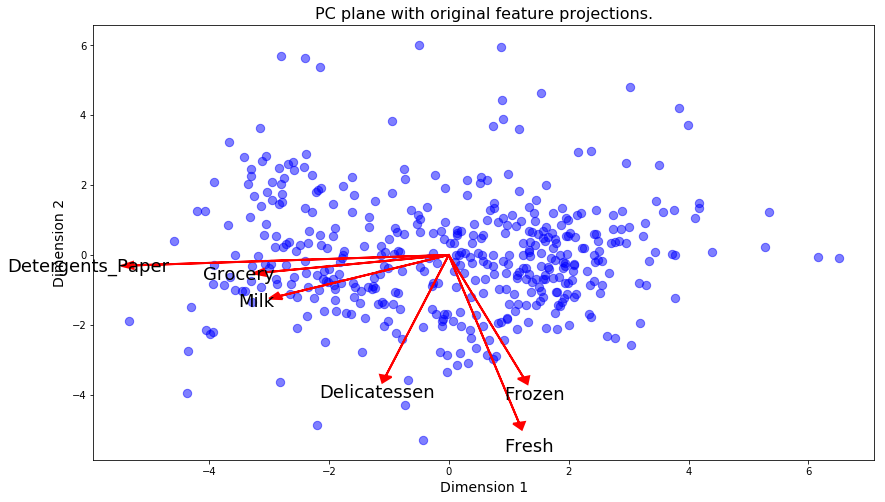

In [200]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### 观察

一旦我们有了原始特征的投影（红色箭头），就能更加容易的理解散点图每个数据点的相对位置。

在这个双标图中，哪些初始特征与第一个主成分有强关联？哪些初始特征与第二个主成分相关联？你观察到的是否与之前得到的 pca_results 图相符？

答：从图中可以看到，

- 第一维度上主要集中了曾经的  Fresh / Frozen / Deli 这三个特征，
- 第二维度上则集中了 Milk / Grocery / Detergents_Paper 这三个特征。

这与pca成分图里的前两个主成分中的特征占比图吻合（下面是之前分析的每个主成分的构成方式）

- 第0个主成分中：Milk + Grocery + Detergents_Paper 一伙，与 Fresh + Frozen 呈负相关。
- 第1个主成分中：Fresh + Frozen + Deli 一伙，与其他特征全都呈正相关。

## 聚类

在这个部分，你讲选择使用K-Means聚类算法或者是高斯混合模型聚类算法以发现数据中隐藏的客户分类。然后，你将从簇中恢复一些特定的关键数据点，通过将它们转换回原始的维度和规模，从而理解他们的含义。

### 问题 6
*使用K-Means聚类算法的优点是什么？使用高斯混合模型聚类算法的优点是什么？基于你现在对客户数据的观察结果，你选用了这两个算法中的哪一个，为什么？*

**回答:**

### K-Means 优点

- 当样本量很庞大时，K-Means算法的时间复杂度随是样本数量线性增长 $O(N)$，快速而高效。

### K-Means 缺点

- 初始点位置的选取会极大的影响聚类结果，因此需要多次启动求平均
- 聚类个数$K$的选取原则并不明确
- 对outlier敏感
- 对于混叠严重的数据分类效果不好
- 聚类的形状只能是球状

### GMM 聚类的优点

- 基于概率分布，因此判决是软判决，对于混叠较严重的聚类有更好的分类效果。
- 聚类的形状不局限于球型，可以扭曲为椭球型。

### GMM 聚类的缺点

- 同样需要面对初始点选取问题和聚类个数确定问题。
- 实际上，K-Means可以理解为GMM的特殊形式，即判决为100%的情形。因此K-Means的一些缺点GMM依然有。

按理说GMM因为使用了软判决，应该会被K-Means好一些，但是也得根据具体数据集的特点来决定。实践出真知，本着实验的目的，我两个算法都用了下，具体结果见后面的计算。

### 练习: 创建聚类

针对不同情况，有些问题你需要的聚类数目可能是已知的。但是在聚类数目不作为一个**先验**知道的情况下，我们并不能够保证某个聚类的数目对这个数据是最优的，因为我们对于数据的结构（如果存在的话）是不清楚的。但是，我们可以通过计算每一个簇中点的**轮廓系数**来衡量聚类的质量。数据点的[轮廓系数](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)衡量了它与分配给他的簇的相似度，这个值范围在-1（不相似）到1（相似）。**平均**轮廓系数为我们提供了一种简单地度量聚类质量的方法。

$$
\displaystyle
\begin{aligned}
&a = \mathbf{Distance}(\mathrm{sample, \; predicted\_cluster\_center})\\[2ex]
&b = \mathbf{Distance}(\mathrm{sample, \; other\_nearest\_cluster\_center})\\[2ex]
&\mathbf{Silhouette \; Score_{\; Sample}} = \frac {b - a}{\max(a, b)}\\[2ex]
&\mathbf{Silhouette \; Score_{\; Mean}} = \frac{1}{n} \cdot \sum_{i=1}^n \frac {b_i - a_i}{\max(a_i, b_i)} \quad \in [-1, 1]
\end{aligned}
$$

- $b-a$ 通过符号可以判断该Sample点离所分配的聚类中心近还是别的聚类中心近。
- $\max(a,b)$ 用于将系数缩放至单位1范围内。


在接下来的代码单元中，你将实现下列功能：
 - 在`reduced_data`上使用一个聚类算法，并将结果赋值到`clusterer`，需要设置 `random_state` 使得结果可以复现。
 - 使用`clusterer.predict`预测`reduced_data`中的每一个点的簇，并将结果赋值到`preds`。
 - 使用算法的某个属性值找到聚类中心，并将它们赋值到`centers`。
 - 预测`pca_samples`中的每一个样本点的类别并将结果赋值到`sample_preds`。
 - 导入sklearn.metrics.silhouette_score包并计算`reduced_data`相对于`preds`的轮廓系数。
   - 将轮廓系数赋值给`score`并输出结果。

### 使用K-Means进行聚类划分

In [201]:
# TODO：在降维后的数据上使用你选择的聚类算法
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=2, max_iter=500, n_init=10, random_state=0)
clusterer.fit(reduced_data)

# TODO：预测每一个点的簇
preds = clusterer.predict(reduced_data)    # preds 是每一条记录的所属类编号号，取值范围为[0, n_clusters - 1]

# TODO：找到聚类中心
centers = clusterer.cluster_centers_

# TODO：预测在每一个转换后的样本点的类
sample_preds = clusterer.predict(pca_samples)

# TODO：计算选择的类别的平均轮廓系数（mean silhouette coefficient）
score = silhouette_score(reduced_data, preds)
print score

0.426281015469


In [202]:
print clusterer.cluster_centers_

[[ 1.49093664 -0.10743169]
 [-2.17322969  0.15659534]]


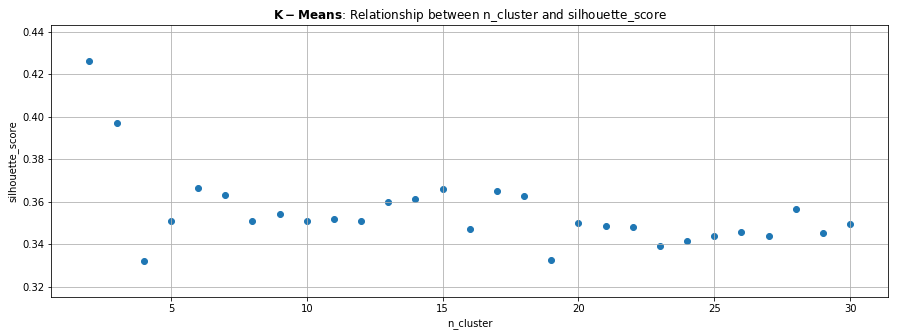

In [203]:
# 查看聚类个数与轮廓系数之间的关系
def cluster_score_relation(max_clusters):
    stats = []
    for c in range(2, max_clusters + 1):
        clusterer = KMeans(n_clusters=c, max_iter=100, n_init=10, random_state=0)
        clusterer.fit(reduced_data)
        preds = clusterer.predict(reduced_data)
        score = silhouette_score(reduced_data, preds)
        stats.append(score)
#         print 'Cluster {} has Silhouette Score {}'.format(c, score)
    return stats

search_range = 30
stats = cluster_score_relation(search_range)
plt.figure(figsize=(15, 5))
plt.title("$\mathbf{K-Means}$: Relationship between n_cluster and silhouette_score")
plt.scatter(range(2, search_range + 1), stats)
plt.grid(True)
plt.xlabel('n_cluster')
plt.ylabel('silhouette_score')
plt.show()

### 使用高斯混合模型进行聚类划分

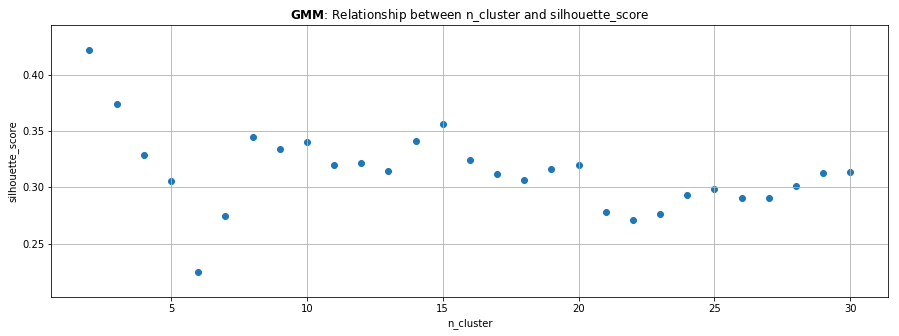

In [204]:
from sklearn.mixture import GaussianMixture

# 查看聚类个数与轮廓系数之间的关系
def cluster_score_relation(max_clusters):
    stats = []
    for c in range(2, max_clusters + 1):
        clusterer = GaussianMixture(n_components=c, random_state=0)
        clusterer.fit(reduced_data)
        preds = clusterer.predict(reduced_data)
        score = silhouette_score(reduced_data, preds)
        stats.append(score)
#         print '{} Cluster has Silhouette Score {}'.format(c, score)
    return stats

search_range = 30
stats = cluster_score_relation(search_range)
plt.figure(figsize=(15, 5))
plt.title("$\mathbf{GMM}$: Relationship between n_cluster and silhouette_score")
plt.scatter(range(2, search_range + 1), stats)
plt.grid(True)
plt.xlabel('n_cluster')
plt.ylabel('silhouette_score')
plt.show()

### 问题 7

*汇报你尝试的不同的聚类数对应的轮廓系数。在这些当中哪一个聚类的数目能够得到最佳的轮廓系数？* 

**回答:** 2个。

分别使用K-Means和GMM进行聚类划分，为了确定最佳聚类个数，对n_clusters进行参数搜索，计算聚类个数从2至30时的对应轮廓系数值，将两者之间的关系通过画图呈现出来（见上面的Cell）。

可以看到，达到全局最高值（0.426）的聚类个数是2.

n_clusters | silhouette_score
---  | ---
2    | 0.426
3    | 0.393
4    | 0.332
...  | ...

GMM得到的最佳聚类划分个数与K-Means一致，都是2个。平均轮廓系数也十分相近，K-Means为0.426，GMM则是0.424，可以说差距十分微小。

### 聚类可视化
一旦你选好了通过上面的评价函数得到的算法的最佳聚类数目，你就能够通过使用下面的代码块可视化来得到的结果。作为实验，你可以试着调整你的聚类算法的聚类的数量来看一下不同的可视化结果。但是你提供的最终的可视化图像必须和你选择的最优聚类数目一致。

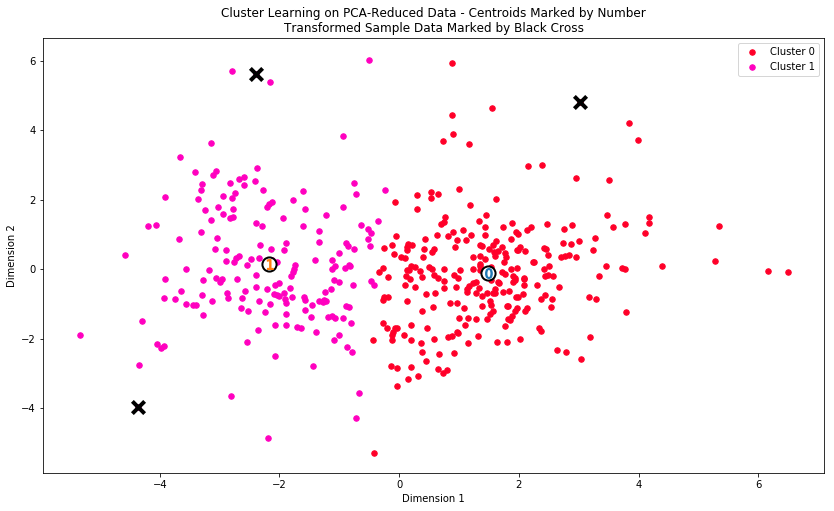

In [205]:
# 从已有的实现中展示聚类的结果
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### 练习: 数据恢复
上面的可视化图像中提供的每一个聚类都有一个中心点。这些中心（或者叫平均点）并不是数据中真实存在的点，但是是所有预测在这个簇中的数据点的*平均*。对于创建客户分类的问题，一个簇的中心对应于*那个分类的平均用户*。因为这个数据现在进行了降维并缩放到一定的范围，我们可以通过施加一个反向的转换恢复这个点所代表的用户的花费。

在下面的代码单元中，你将实现下列的功能：
 - 使用`pca.inverse_transform`将`centers` 反向转换，并将结果存储在`log_centers`中。
 - 使用`np.log`的反函数`np.exp`反向转换`log_centers`并将结果存储到`true_centers`中。


In [206]:
# TODO：反向转换中心点
log_centers = pca.inverse_transform(centers)

# TODO：对中心点做指数转换
true_centers = np.exp(log_centers)

# 显示真实的中心点(给true_centers加上列名和Index名)
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


### 问题 8
考虑上面的代表性数据点在每一个产品类型的花费总数，*你认为这些客户分类代表了哪类客户？为什么？*需要参考在项目最开始得到的统计值来给出理由。

**提示：** 一个被分到`'Cluster X'`的客户最好被用 `'Segment X'`中的特征集来标识的企业类型表示。

#### 两类客户细分的典型特征数值对比整体均值（需求量最大的特征用粗体标注）

Data  |Fresh | Milk | Grocery | Frozen | Deter_Paper | Deli
---   |---   | ---  | ---     | ---    | ---              | ---
**Segment 0** |	$\color{red} {9041}$  |	1924 |	2508 | 	2116.0	| 301.0	| 689.0
**Segment 1** |	3754	|7970	| $\color{red} {12296}$	|904	| 4666	|1027
**Average**   | 12000   | 5769  | 7951  | 3071  | 2881  | 1524

**回答:**

- Segment 0的典型客户主要需要Fresh，辅助以少量Grocery/Frozen/Milk，几乎不需要Detergents_Paper和Deli。主营生鲜。

- Segment 1的典型客户主要需要Grocery，辅助以远超平均值的大量Milk/Detergents_Paper/Fresh，对Frozen和Deli需求较少。主营非食物。

进一步分析有以下结论：

- Segment 0各方面的购入金额都偏小(相比于数据集平均值而言)，主营Fresh，以及少量其他食品类型，因此应该是**食品专卖零售店企业**。

- Segment 1主要需求是非食物。通常来讲对各项杂物和清洁用品需求量大的企业通常是服务行业，例如酒店。考虑到Milk和Fresh也有一定购入，因此也涉及到咖啡馆等简食行业。综合起来，Segment1应该是提供咖啡馆或者in-room dining的**酒店/餐饮企业**。


结合之前对于主成分的分析可以看到，**主成分并不能代表一类客户，而仅仅是客户的一类行为特质而已**。
- 第0个主成分中：Milk + Grocery + Detergents_Paper 一伙。这应该是光卖牛奶和非食物，或者卖食物就不卖牛奶和非食物的行为特质。
- 第1个主成分中：Fresh + Frozen + Deli 一伙，与其他特征全都呈正相关。这应该是什么都卖，而且主要卖食品的行为特质。
- 第2个主成分中：Fresh + Detergents_Paper 一伙，与 Deli + Frozen 呈强烈负相关，这应该是卖熟食和冷冻食品，但是不卖生鲜的行为特质。
- 第3个主成分中：Deli + Fresh 一伙，与 Frozen 呈强烈负相关，这应该是卖熟食和生鲜，但是不卖冷冻食品的行为特质（和上面的组合不同）。

### 问题 9
*对于每一个样本点 * **问题 8**  *中的哪一个分类能够最好的表示它？你之前对样本的预测和现在的结果相符吗？*

运行下面的代码单元以找到每一个样本点被预测到哪一个簇中去。

In [207]:
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,44466,54259,55571,7782,24171,6465
1,23,2616,8118,145,3874,217
2,3,333,7021,15601,15,550


In [208]:
# 显示预测结果
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**回答:**

计算结果显示，前两个样本都被归为了酒店/餐饮企业，而最后一个样本被归为零售企业。

我最初分析的结果是，第一个样本属于大型超市，第二个样本属于咖啡馆，第三个样本属于零售店。由于第一个样本各方面数值都很庞大，因此如果属于万豪这种大型连锁酒店来说，也是合理的。

## 结论

在最后一部分中，你要学习如何使用已经被分类的数据。首先，你要考虑不同组的客户**客户分类**，针对不同的派送策略受到的影响会有什么不同。其次，你要考虑到，每一个客户都被打上了标签（客户属于哪一个分类）可以给客户数据提供一个多一个特征。最后，你会把客户分类与一个数据中的隐藏变量做比较，看一下这个分类是否辨识了特定的关系。

### 问题 10
在对他们的服务或者是产品做细微的改变的时候，公司经常会使用[A/B tests](https://en.wikipedia.org/wiki/A/B_testing)以确定这些改变会对客户产生积极作用还是消极作用。这个批发商希望考虑将他的派送服务从每周5天变为每周3天，但是他只会对他客户当中对此有积极反馈的客户采用。*这个批发商应该如何利用客户分类来知道哪些客户对它的这个派送策略的改变有积极的反馈，如果有的话？你需要给出在这个情形下A/B 测试具体的实现方法，以及最终得出结论的依据是什么？*  
**提示：** 我们能假设这个改变对所有的客户影响都一致吗？我们怎样才能够确定它对于哪个类型的客户影响最大？

**回答：**

由于目前客户只分为两类：食品零售商，以及酒店/餐馆等服务性企业。派送的频率降低，会如何对这两类企业产生积极或消极的影响呢？

由于派送频率降低对两类客户的影响很有可能不同，因此为了确定影响各是什么样的，我们需要对两类企业分别随机抽样，从食品零售商大类中挑选50%的企业采用新的配送方案（称为方案B），另50%保持不变（称为方案A）。然后对酒店/餐饮这类企业中做同样的事情。

在实施A/B测试一段时间以后，收集所有客户的反馈。针对每类客户，统计到底方案A还是方案B的积极反馈多。如果方案B的积极反馈远远大于方案A，那么最后就会推广方案B。

其实严谨的讲应该具体分析积极反馈和消极反馈的占比，有可能需要在每类企业内再按某些因素进一步细分才能做到真正精确，毕竟目前划分的这两大类还相当宽泛。酒店和饭馆对于进货的频次需求肯定是不同的，这需要结合领域知识进一步分析。

### 问题 11
通过聚类技术，我们能够将原有的没有标记的数据集中的附加结构分析出来。因为每一个客户都有一个最佳的划分（取决于你选择使用的聚类算法），我们可以把*用户分类*作为数据的一个[**工程特征**](https://en.wikipedia.org/wiki/Feature_learning#Unsupervised_feature_learning)。假设批发商最近迎来十位新顾客，并且他已经为每位顾客每个产品类别年度采购额进行了预估。进行了这些估算之后，批发商该如何运用它的预估和**非监督学习的结果**来对这十个新的客户进行更好的预测？

**提示：**在下面的代码单元中，我们提供了一个已经做好聚类的数据（聚类结果为数据中的cluster属性），我们将在这个数据集上做一个小实验。尝试运行下面的代码看看我们尝试预测‘Region’的时候，如果存在聚类特征'cluster'与不存在相比对最终的得分会有什么影响？这对你有什么启发？

- **CHANNEL**: customer Channel - HoReCa (Hotel/Restaurant/Cafe) or Retail channel (Nominal) 
- **REGION**: customers Region - Lisnon, Oporto or Other (Nominal) 

In [209]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# 读取包含聚类结果的数据
cluster_data = pd.read_csv("cluster.csv")
y = cluster_data['Region']
X = cluster_data.drop(['Region'], axis = 1)

In [210]:
cluster_data.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,cluster
0,3,12669,9656,7561,214,2674,1338,1
1,3,7057,9810,9568,1762,3293,1776,1
2,3,6353,8808,7684,2405,3516,7844,1
3,3,13265,1196,4221,6404,507,1788,0
4,3,22615,5410,7198,3915,1777,5185,1


In [211]:
# 划分训练集测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=24)

clf = RandomForestClassifier(random_state=24)
clf.fit(X_train, y_train)
print "使用cluster特征的得分", clf.score(X_test, y_test)

# 移除cluster特征
X_train = X_train.copy()
X_train.drop(['cluster'], axis=1, inplace=True)
X_test = X_test.copy()
X_test.drop(['cluster'], axis=1, inplace=True)
clf.fit(X_train, y_train)
print "不使用cluster特征的得分", clf.score(X_test, y_test)

使用cluster特征的得分 0.666666666667
不使用cluster特征的得分 0.64367816092


In [212]:
# 直接用cluster特征对region进行预测
only_cluster = X['cluster'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(only_cluster, y, train_size=0.8, random_state=24)

clf = RandomForestClassifier(random_state=24)
clf.fit(X_train, y_train)
print "只使用cluster特征的得分", clf.score(X_test, y_test)

只使用cluster特征的得分 0.724137931034


**回答：**

使用聚类特征cluster的模型对测试数据的Region预测的更为准确。

这说明了cluster本身是含有一定信息量的，且该特征与Region特征之间也存在着一定的相关性。（比较诡异的是，我试着只用cluster对region进行预测，发现平均准确率竟然比用所有特征的得分还要高...增加特征真的会降低准确率么）

### 可视化内在的分布

在这个项目的开始，我们讨论了从数据集中移除`'Channel'`和`'Region'`特征，这样在分析过程中我们就会着重分析用户产品类别。通过重新引入`Channel`这个特征到数据集中，并施加和原来数据集同样的PCA变换的时候我们将能够发现数据集产生一个有趣的结构。

运行下面的代码单元以查看哪一个数据点在降维的空间中被标记为`'HoReCa'` (旅馆/餐馆/咖啡厅)或者`'Retail'`。另外，你将发现样本点在图中被圈了出来，用以显示他们的标签。

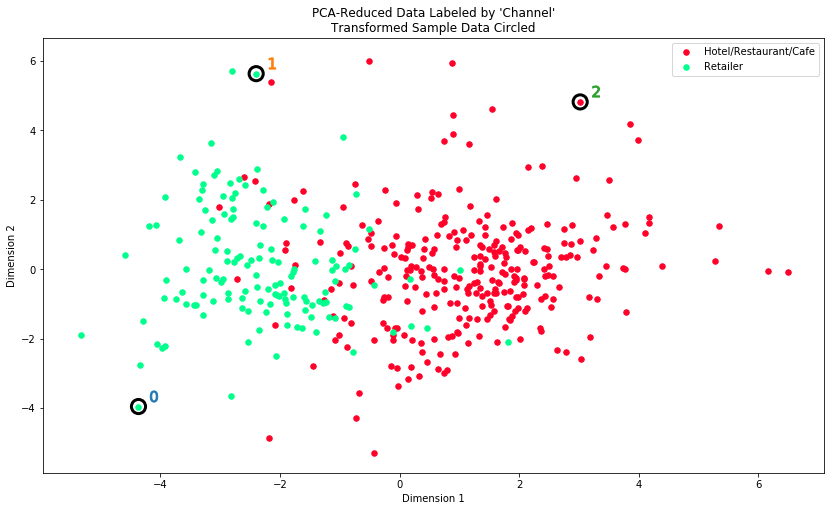

In [213]:
# 根据‘Channel‘数据显示聚类的结果
vs.channel_results(reduced_data, outliers, pca_samples)

### 问题 12

*你选择的聚类算法和聚类点的数目，与内在的旅馆/餐馆/咖啡店和零售商的分布相比，有足够好吗？根据这个分布有没有哪个簇能够刚好划分成'零售商'或者是'旅馆/饭店/咖啡馆'？你觉得这个分类和前面你对于用户分类的定义是一致的吗？*

**回答：**

从原数据类别所画的图中可以看到，两个分类的混叠程度还是挺厉害的，每个聚类都有不少样本点深入了对方的地盘，你中有我，我中有你，并没有一个特别明确的分界线来划分零售商与旅馆/饭店/咖啡馆。

因此，K-Means所硬性划分出的左右两个分类区域与原数据相比，虽然整体趋势是对的，还是在具体点上仍然有一定差距。

### 更新疑问1 - 针对混叠数据的聚类划分

Review中说：“你被给的图误导了。这里应该把概率plot出来，就更清楚了。GMM就是用来处理混叠数据的。“

- 首先，我不太明白把概率plot出来是什么意思？


- 既然说GMM是专门用来处理混叠数据的，那么为什么画出来的聚类划分图中并没有看到像cluster.csv数据中交错的划分情况呢？或者说到底如何画出GMM的混叠划分呢？


- 在更新回答问题4的计算中已经显示，以cluster.csv中真实的标签数据（Ground Truth）作为参照，针对同样的数据，KMeans的聚类划分准确度其实是高于GMM的，同时，在移除相同的异常点前后，GMM比KMeans还要敏感。这两个现象和上面的说明是直觉上相悖的，不知道该如何解释？我们已经可以看到真实数据中两个分类是相当混叠的，那为什么善于处理混叠数据的软判决GMM会比K-Means还要差呢？

### 疑问2解答 - 衡量聚类好坏的性能度量

从这个项目中我主要学到的是用轮廓系数（Silhouette Score）来对没有标签的数据集评估聚类的好坏。我看到sklearn里面介绍了很多针对聚类好坏的评估度量（Clustering performance evaluation），想知道最常用的除了轮廓系数以外，还有哪些是常用的？

Review中的回答是：[Sklearn页面](http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)要完全消化需要点时间。这些都应用在不同场景下，前面几个都需要ground truth，最后两个可以不用。这样也可以帮你做决定。

### 插曲 - whiten

在进行PCA处理以及KMeans聚类时，遇到了whiten这个坑。起因是在练习eigenface迷你项目的时候，发现那里面用的PCA必须得加**whiten=True**才能正确计算混淆矩阵，否则会报错且图像识别中也会错误识别的。

于是我在没有搞清楚这个参数是干什么的情况下就直接套用到这个项目上。即

```
pca = PCA(n_components=2, random_state=0, whiten=True)
```

起初并没有什么异常，但在回答后续问题的时候，就发现不仅在画Biplot的时候箭头会突破天际，而且进行KMeans聚类时，使轮廓系数最佳的聚类个数是3（后来才知道应该是2）。此时我还蒙在鼓里，继续按三类客户(酒店咖啡/零售/大型超市)进行分析(见下个cell，也不是没有道理,写了好多不舍得删了...)，分析的时候就觉得很拧巴，聚类划分图也感觉不太对，感觉是在强行往三个方向上靠。到最后两个问题时，看了UCI资源库网页才发现原来原始数据是带标签的，而且人家只划分了两大类而已，和我预测出来的三类不匹配。然后返回来查问题，最后发现问题的根因出在PCA划分时使用了whiten。后面六七个问题的解答只得推倒重写...

sklearn方面对whiten参数的解释是：Whitening will remove some information from the transformed signal (the relative variance scales of the components) but can sometime improve the predictive accuracy of the downstream estimators by making their data respect some hard-wired assumptions.

搜索了一下关于PCA白化方面的信息，了解到PCA Whiten是用于去除特征之间相关性的一种操作，可以进一步的去除冗余，将特征空间上的数据分布从高维椭球面拉为正球型，从而提高后续SVM之类算法的准确性，对相邻像素点冗余度较高的图像处理问题上经常使用白化作为预处理的一步。

既然whiten对于相关数据有好的疗效，我不太明白为什么whiten在处理这个客户细分的问题上会对聚类性能有负面影响。在项目最初用特征预测特征的实验上，就可以发现，像Fresh和Deli这两个特征的预测分数是负值，说明无法被其他特征预测，已经是相关性较低的了，而Detergents_Paper是与Milk和Grocery高度相关的。那么whiten为什么不能用呢？

换句话说，PCA白化通常应该在什么样的数据集上才应该用？只能靠试轮廓系数么？

本项目参考数据：
- 关whiten的平均轮廓系数的极值是0.42（在聚类数为2的时候达到）
- 开whiten的平均轮廓系数的极值是0.39（在聚类数为3的时候达到）

#### 三类客户的典型特征数值对比整体均值（需求量最大的特征用粗体标注）

Data  |Fresh | Milk | Grocery | Frozen | Detergents_Paper | Deli
---   |---   | ---  | ---     | ---    | ---              | ---
**Segment 0** |	1052	| 4725	| $\color{red} {8640}$	| 367	| 2954	| 367
**Segment 1** |	$\color{red} {8651}$	| 1661	| 2173	| 2069	| 238	| 610
**Segment 2** |	$\color{red} {11568}$	| 7814	| 10229	| 2135	| 3056	| 1888
**Average**   | 12000   | 5769  | 7951  | 3071  | 2881  | 1524

**回答:**

- Segment 0的典型客户主要需要Grocery，辅助以Milk/Detergents_Paper/Fresh，几乎不需要Frozen和Deli。主营非食物。

- Segment 1的典型客户主要需要Fresh，辅助以Grocery/Frozen/Milk，几乎不需要Detergents_Paper和Deli。主营生鲜。

- Segment 2的典型客户主要需要Fresh和Grocery，辅助以大量的Milk，Detergents_Paper，Frozen以及Deli。所有特征的需求量都很大。

通过三个客户细分在具体特征数值上的相互对比以及与整个数据集平均值的对比，有以下结论：

- Segment0和Segment1都**有明确的主营内容**。
    - Segment0主要需求是非食物，其Grocery和Detergents_Paper两项数值都超过了数据集的均值。对各项杂物和清洁用品需求量大的企业通常是服务行业，例如酒店。考虑到Segment0还辅助购入一定数量的Milk和Fresh，可能涉及到咖啡馆行业。综合起来，Segment0应该是提供咖啡馆或者in-room dining的酒店企业。

    - Segment1主要需求是生鲜，特别是Fresh。由于其各项特征的数值相对数据集均值都较小，可以推测应该属于类似于经营生鲜的零售店企业。


- Segment2**没有特别明确的主营内容**，在6个特征中有5个都全面超过了数据集均值，进货量巨大，应该属于大型连锁超市企业。


> **注意**: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。  